# Практическое задание

In [1]:
import pandas as pd

In [2]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

Визуализация набора данных MNIST

In [3]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
X.shape

(1797, 64)

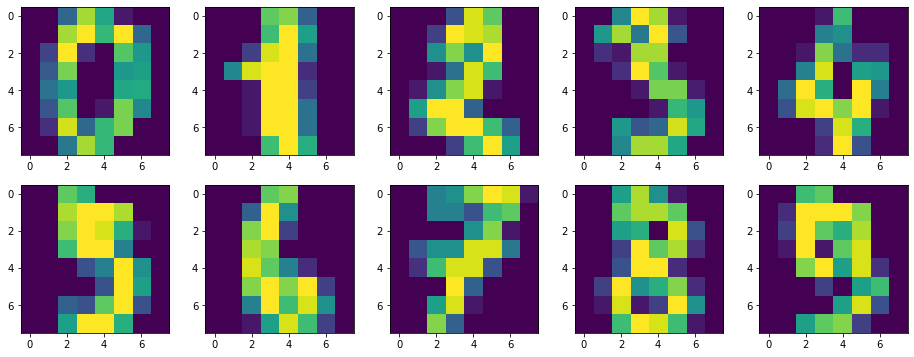

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

## Понижение размерности

**PCA**

In [8]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1797, 2)

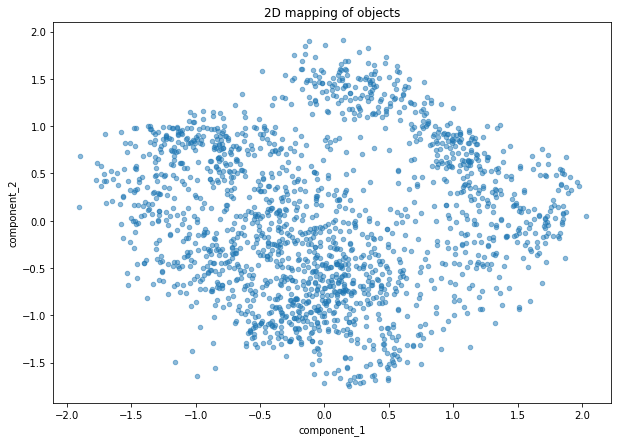

In [9]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

**TSNE**

In [10]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=25)

X_tsne = tsne.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 31.2 s, sys: 252 ms, total: 31.5 s
Wall time: 8.24 s


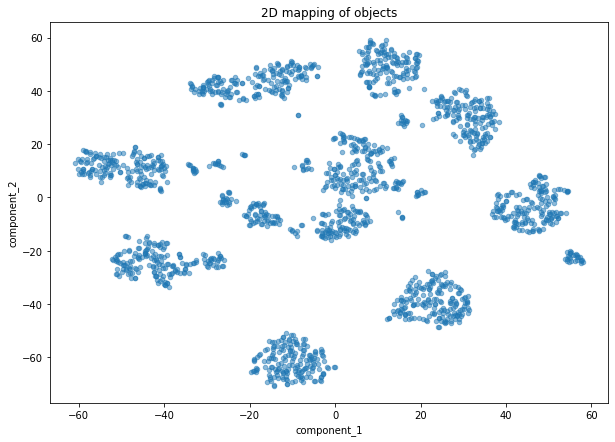

In [11]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

## Кластеризация

**KMeans**

In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [13]:
kmeans = KMeans(n_clusters=11, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

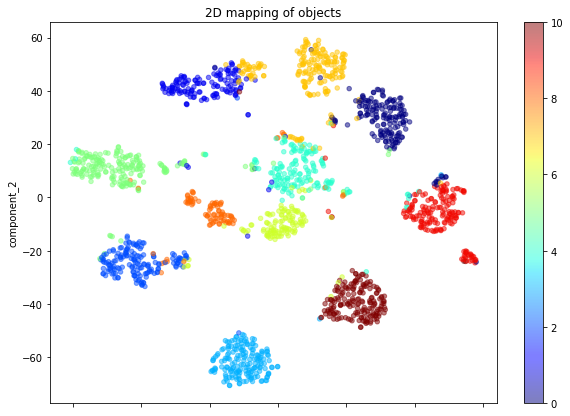

In [14]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**AgglomerativeClustering**

In [15]:
%%time
aggl = AgglomerativeClustering(n_clusters=11)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

CPU times: user 164 ms, sys: 19 ms, total: 183 ms
Wall time: 197 ms


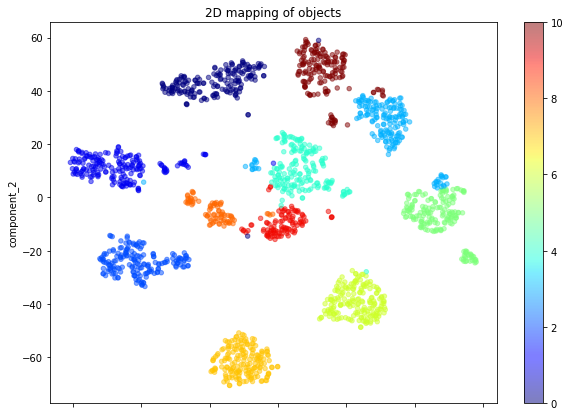

In [16]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

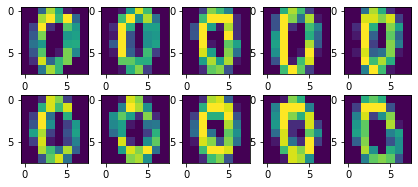

In [17]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 7][i,:].reshape([8,8]))

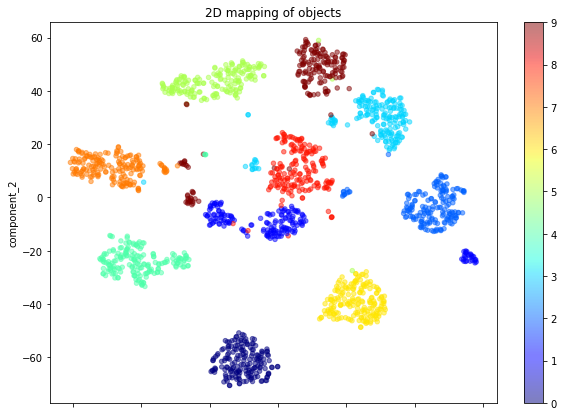

In [18]:
display_components_in_2D_space(components_X_tsne, labels=y)

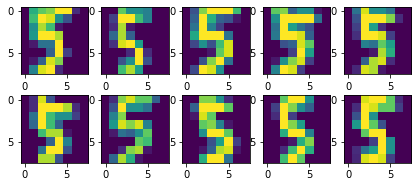

In [19]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 0][i,:].reshape([8,8]))

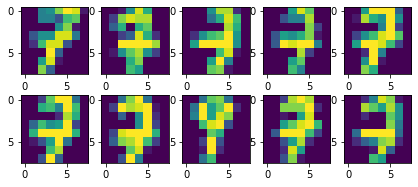

In [20]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 1][i,:].reshape([8,8]))

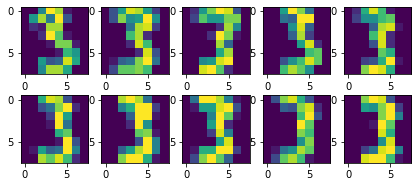

In [21]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 3][i,:].reshape([8,8]))

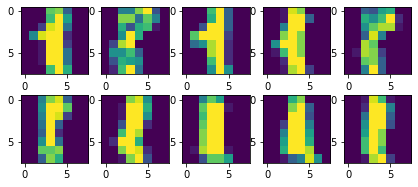

In [22]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 9][i,:].reshape([8,8]))

В целом модель отработала хорошо за исключением девятого кластера из-за большого разброса. Скорее всего это единица

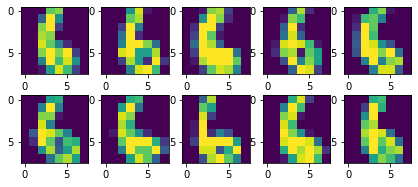

In [23]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 6][i,:].reshape([8,8]))